In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

# input data from csv file

In [ ]:
Metal = pd.read_csv('dataset_114.csv')

# print first 5 value from the data frame

In [ ]:
Metal.head()

# Data Pre processing
Preprocessing involves the following aspects:

missing values 

data standardization

data normalization

data binning

In [ ]:
df = Metal

check null value present or not

In [ ]:
df.isnull()
print('all null values is true or false manner')

Find out where null values are present

In [ ]:
df.isnull().sum()

Drop the row contain NAN

In [ ]:
df.dropna()


Drop first and last column

In [ ]:
df = df.drop(['Alloy and Temper','other_prop'],axis=1)

In [ ]:
df = df.dropna(how = 'all')

In [ ]:
#all nan value removed except elogation
df.isnull().sum()

To Know the dhape of dataframe

In [ ]:
df.shape

Fill the NAN values from the dataframe

In [ ]:
#replace NAN value with 0
df1 = df.fillna()

In [ ]:
df1 = df.fillna(method='ffill') #method=ffill the null value withprevious values

In [ ]:
df1.isna().sum()

# data divided into two parts traning and testing

In [ ]:
#data divided into two parts traning and testing
X = df1[['Hardness', 'USS', 'Fatigue','Elasticity']]
y = df1['UTS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
Data Normalization
Data standardization
Data normalization refers to shifting the values of your data so they fall between 0 and 1. Data standardization, in this context, is used as a scaling technique to establish the mean and the standard deviation at 0 and 1, respectively.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the Neural Netwok

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# Classification

In [10]:
import tensorflow as tf

In [4]:
df = pd.read_csv('ce.csv')
df.head()

,Fe,Mn,C,CE,S,P,Tensile Strength,Yield Strength,Elongation,Reduction in area,Hardness,Process
0,1.000000,0.121864,0.000000,0.000000,0.158854,0.0,0.000000,0.000000,1.00,1.000000,0.000000,0
1,0.953804,0.175627,0.025157,0.039039,0.208333,0.0,0.018349,0.010989,1.00,1.000000,0.000000,0
2,0.885870,0.211470,0.056604,0.079079,0.247396,0.0,0.064220,0.043956,0.90,0.833333,0.055556,0
3,0.869565,0.000000,0.465409,0.410410,0.263021,0.0,0.091743,0.054945,0.90,0.833333,0.092593,0
4,0.600543,0.426523,0.088050,0.169169,0.416667,0.0,0.155963,0.087912,0.75,0.833333,0.148148,0


Number of Hot: 61
Number of Cold: 47
Number of ACold: 9
Number of SCold: 12


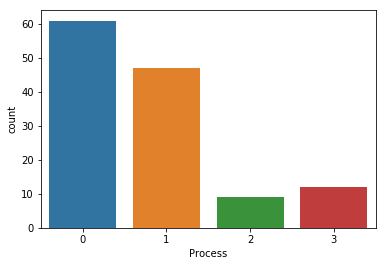

In [5]:
# y includes our labels and x includes our features
y = df.Process                         # M or B 
list = ['Process']
x = df.drop(list,axis = 1 )
x.head()
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
Hot,Cold,ACold,SCold = y.value_counts()
print('Number of Hot:',Hot)
print('Number of Cold:',Cold)
print('Number of ACold:',SCold)
print('Number of SCold:',ACold)

# Correlation maping

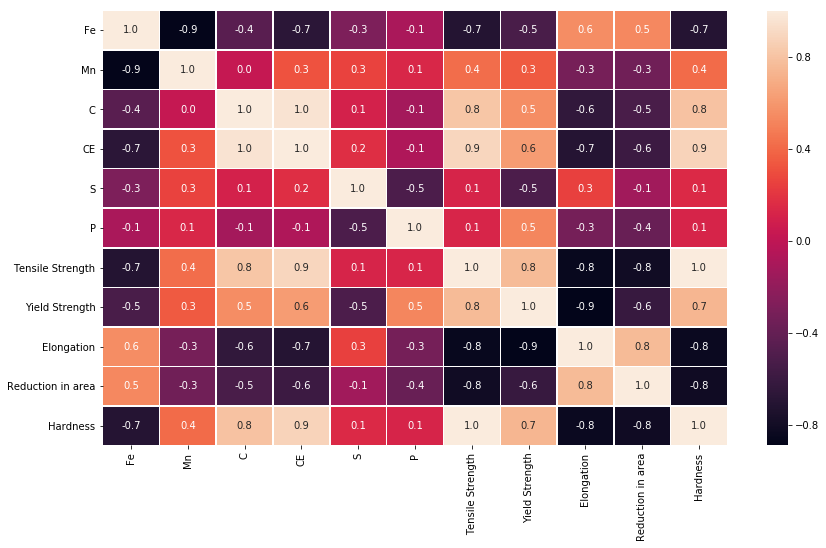

In [6]:
#correlation map
f,ax = plt.subplots(figsize=(14, 8))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Buliding the ANN

In [11]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=11,input_dim=11, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units= 4, activation='softmax'))

# Part 3 - Training the ANN

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
103/103 [==============================] - 4s 42ms/step - loss: 1.3446 - acc: 0.2816
Epoch 2/100
103/103 [==============================] - 0s 369us/step - loss: 1.3228 - acc: 0.3010
Epoch 3/100
103/103 [==============================] - 0s 243us/step - loss: 1.3031 - acc: 0.3592
Epoch 4/100
103/103 [==============================] - 0s 223us/step - loss: 1.2833 - acc: 0.4272
Epoch 5/100
103/103 [==============================] - 0s 311us/step - loss: 1.2635 - acc: 0.4466
Epoch 6/100
103/103 [==============================] - 0s 184us/step - loss: 1.2439 - acc: 0.4369
Epoch 7/100
103/103 [==============================] - 0s 252us/step - loss: 1.2256 - acc: 0.4660
Epoch 8/100
103/103 [==============================] - 0s 213us/step - loss: 1.2063 - acc: 0.4854
Epoch 9/100
103/103 [==============================] - 0s 204us/step - loss: 1.1867 - acc: 0.5340
Epoch 10/100
103/103 [==============================] - 0s 272us/step - loss: 1.1679 - acc: 0.5340
Epoch 11/100
103/103

103/103 [==============================] - 0s 184us/step - loss: 0.1854 - acc: 0.9515
Epoch 84/100
103/103 [==============================] - 0s 306us/step - loss: 0.1825 - acc: 0.9515
Epoch 85/100
103/103 [==============================] - 0s 146us/step - loss: 0.1794 - acc: 0.9515
Epoch 86/100
103/103 [==============================] - 0s 155us/step - loss: 0.1767 - acc: 0.9515
Epoch 87/100
103/103 [==============================] - 0s 485us/step - loss: 0.1739 - acc: 0.9515
Epoch 88/100
103/103 [==============================] - 0s 184us/step - loss: 0.1713 - acc: 0.9515
Epoch 89/100
103/103 [==============================] - 0s 175us/step - loss: 0.1688 - acc: 0.9515
Epoch 90/100
103/103 [==============================] - 0s 349us/step - loss: 0.1664 - acc: 0.9515
Epoch 91/100
103/103 [==============================] - 0s 184us/step - loss: 0.1641 - acc: 0.9515
Epoch 92/100
103/103 [==============================] - 0s 165us/step - loss: 0.1621 - acc: 0.9515
Epoch 93/100
103/103 [=

In [12]:
# evaluate the model
scores = ann.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))

26/26 [==============================] - 0s 3ms/step

acc: 96.15%


# single value prediction

In [14]:
print(ann.predict(sc.transform([[1,0.121863799,0,0,0.158854167,0,0,0,1,1,0]])) > 0.5)

[[ True False False False]]


# Confusion Matrix

In [15]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# predict probabilities for test set
yhat_probs = ann.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = ann.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [18]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, pos_label='positive', average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes, pos_label='positive', average='micro')
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)

#confution matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.961538
Precision: 0.961538
Recall: 0.961538
F1 score: 0.961538
Cohens kappa: 0.938679
[[12  0  0  0]
 [ 0 10  0  0]
 [ 0  0  1  1]
 [ 0  0  0  2]]


C:\Users\achoudhury\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\achoudhury\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\achoudhury\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


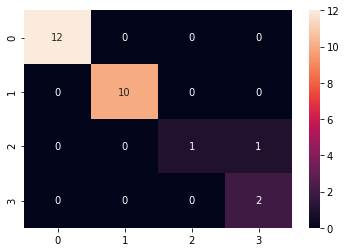

In [19]:
sns.heatmap(matrix,annot=True,fmt="d")